In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss

# Data Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_excel('/content/drive/MyDrive/homeworks/ФТИАД/TS/PJ 2/Project 2_2023.xlsx')

data['Date'] = pd.to_datetime(data['Date'])
data.head()
data.shape

(1543, 4)

In [4]:
#https://www.cbr.ru/hd_base/infl/
CB = pd.read_excel('/content/drive/MyDrive/homeworks/ФТИАД/TS/PJ 2/Инфляция и ключевая ставка Банка России.xlsm') 
CB['Дата'] = pd.to_datetime(CB['Дата'])
CB.columns = ['Date', 'Key', 'Inflation']
CB = CB.sort_values('Date')
CB.head()

,Date,Key,Inflation
50,2017-01-01,10.00,5.0
49,2017-02-01,10.00,4.6
48,2017-03-01,9.75,4.3
47,2017-04-01,9.75,4.1
46,2017-05-01,9.25,4.1


In [5]:
#https://investfunds.ru/indexes/224/
gold_price_cb = pd.read_excel('/content/drive/MyDrive/homeworks/ФТИАД/TS/PJ 2/gold_price_cb.xlsx') 
gold_price_cb['Date'] = pd.to_datetime(gold_price_cb['Date'])
gold_price_cb = gold_price_cb.sort_values('Date')
gold_price_cb.head()

,Date,Gold
1243,2017-01-09,2262.82
1242,2017-01-10,2264.82
1241,2017-01-11,2280.67
1240,2017-01-12,2297.00
1239,2017-01-13,2308.20


In [6]:
data.index = data['Date']
CB.index = CB['Date']
gold_price_cb.index = gold_price_cb['Date']

In [7]:
data = pd.merge_asof(left=data,right=CB,right_index=True,left_index=True,direction='backward')
data = data.drop(columns = ['Date_y']) 
data = data.rename(columns = {'Date_x': 'Date'})

data = pd.merge_asof(left=data, right=gold_price_cb,right_index=True,left_index=True,direction='backward')
data = data.drop(columns = ['Date_y']) 
data = data.rename(columns = {'Date_x': 'Date'})

data['Inflation_diff'] = data['Inflation'] - data['Inflation'].shift()
data['Key_diff'] = data['Key'] - data['Key'].shift() 
data = data.fillna(0) 
data = data.reset_index(drop=True)

data.head(25)

,Date,Income,Outcome,Balance,Key,Inflation,Gold,Inflation_diff,Key_diff
0,2017-01-09,1.343028,1.487865,-0.155904,10.0,5.0,2262.82,0.0,0.0
1,2017-01-10,1.068610,1.194182,-0.125572,10.0,5.0,2264.82,0.0,0.0
2,2017-01-11,0.944429,0.936663,0.007767,10.0,5.0,2280.67,0.0,0.0
3,2017-01-12,1.672202,0.875379,0.800391,10.0,5.0,2297.00,0.0,0.0
4,2017-01-13,0.955924,0.975645,-0.019721,10.0,5.0,2308.20,0.0,0.0
5,2017-01-14,0.000000,0.000000,0.000000,10.0,5.0,2283.58,0.0,0.0
6,2017-01-15,0.000000,0.000000,0.000000,10.0,5.0,2283.58,0.0,0.0
7,2017-01-16,1.082341,1.024345,0.057996,10.0,5.0,2283.58,0.0,0.0
8,2017-01-17,0.896334,1.448364,-0.548519,10.0,5.0,2304.95,0.0,0.0
9,2017-01-18,0.754759,0.879560,-0.124801,10.0,5.0,2325.18,0.0,0.0


In [8]:
for i in [1,2,3,4,5,7,14,21]:
    data[f'lag{i}'] = np.NaN * data.shape[0]
    for j in range(i, data.shape[0]):
        
        data.loc[j, f'Key_lag{i}'] = data.loc[j-i,'Key']

for i in [1,2,3,4,5,7,14,21]:
    data[f'lag{i}'] = np.NaN * data.shape[0]
    for j in range(i, data.shape[0]):
        
        data.loc[j, f'Inflation_lag{i}'] = data.loc[j-i,'Inflation'] 

for i in [1,2,3,4,5,7,14,21]:
    data[f'lag{i}'] = np.NaN * data.shape[0]
    for j in range(i, data.shape[0]):
        
        data.loc[j, f'Gold_lag{i}'] = data.loc[j-i,'Gold']

for i in [1,2,3,4,5,7,14,21]:
    data[f'lag{i}'] = np.NaN * data.shape[0]
    for j in range(i, data.shape[0]):
        
        data.loc[j, f'lag{i}'] = data.loc[j-i,'Balance'] 

data.head(10)

,Date,Income,Outcome,Balance,Key,Inflation,Gold,Inflation_diff,Key_diff,lag1,...,Inflation_lag14,Inflation_lag21,Gold_lag1,Gold_lag2,Gold_lag3,Gold_lag4,Gold_lag5,Gold_lag7,Gold_lag14,Gold_lag21
0,2017-01-09,1.343028,1.487865,-0.155904,10.0,5.0,2262.82,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-10,1.068610,1.194182,-0.125572,10.0,5.0,2264.82,0.0,0.0,-0.155904,...,NaN,NaN,2262.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-11,0.944429,0.936663,0.007767,10.0,5.0,2280.67,0.0,0.0,-0.125572,...,NaN,NaN,2264.82,2262.82,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-12,1.672202,0.875379,0.800391,10.0,5.0,2297.00,0.0,0.0,0.007767,...,NaN,NaN,2280.67,2264.82,2262.82,NaN,NaN,NaN,NaN,NaN
4,2017-01-13,0.955924,0.975645,-0.019721,10.0,5.0,2308.20,0.0,0.0,0.800391,...,NaN,NaN,2297.00,2280.67,2264.82,2262.82,NaN,NaN,NaN,NaN
5,2017-01-14,0.000000,0.000000,0.000000,10.0,5.0,2283.58,0.0,0.0,-0.019721,...,NaN,NaN,2308.20,2297.00,2280.67,2264.82,2262.82,NaN,NaN,NaN
6,2017-01-15,0.000000,0.000000,0.000000,10.0,5.0,2283.58,0.0,0.0,0.000000,...,NaN,NaN,2283.58,2308.20,2297.00,2280.67,2264.82,NaN,NaN,NaN
7,2017-01-16,1.082341,1.024345,0.057996,10.0,5.0,2283.58,0.0,0.0,0.000000,...,NaN,NaN,2283.58,2283.58,2308.20,2297.00,2280.67,2262.82,NaN,NaN
8,2017-01-17,0.896334,1.448364,-0.548519,10.0,5.0,2304.95,0.0,0.0,0.057996,...,NaN,NaN,2283.58,2283.58,2283.58,2308.20,2297.00,2264.82,NaN,NaN
9,2017-01-18,0.754759,0.879560,-0.124801,10.0,5.0,2325.18,0.0,0.0,-0.548519,...,NaN,NaN,2304.95,2283.58,2283.58,2283.58,2308.20,2280.67,NaN,NaN


# Discovery

In [9]:
data.Date.min(), data.Date.max()

(Timestamp('2017-01-09 00:00:00'), Timestamp('2021-03-31 00:00:00'))

In [10]:
sns.set_style("darkgrid")
sns.set(rc={"figure.figsize":(12, 8)})

<Axes: xlabel='Date', ylabel='Balance'>

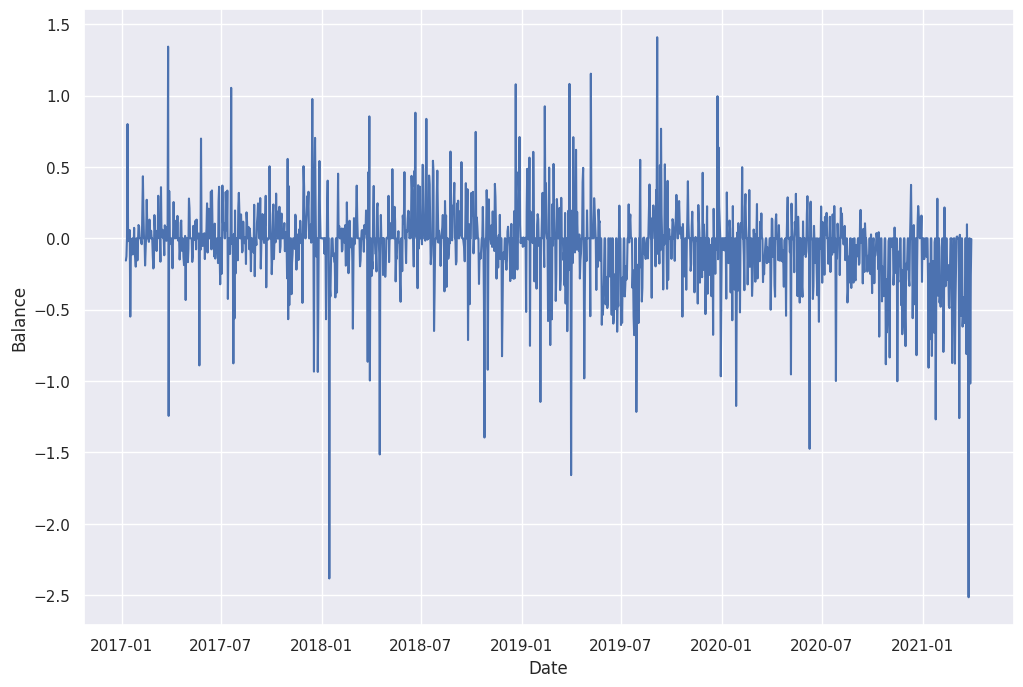

In [11]:
sns.lineplot(data=data, x="Date", y="Balance")

In [12]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data.head()

,Date,Income,Outcome,Balance,Key,Inflation,Gold,Inflation_diff,Key_diff,lag1,...,Gold_lag2,Gold_lag3,Gold_lag4,Gold_lag5,Gold_lag7,Gold_lag14,Gold_lag21,year,month,day
0,2017-01-09,1.343028,1.487865,-0.155904,10.0,5.0,2262.82,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,9
1,2017-01-10,1.068610,1.194182,-0.125572,10.0,5.0,2264.82,0.0,0.0,-0.155904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,10
2,2017-01-11,0.944429,0.936663,0.007767,10.0,5.0,2280.67,0.0,0.0,-0.125572,...,2262.82,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,11
3,2017-01-12,1.672202,0.875379,0.800391,10.0,5.0,2297.00,0.0,0.0,0.007767,...,2264.82,2262.82,NaN,NaN,NaN,NaN,NaN,2017,1,12
4,2017-01-13,0.955924,0.975645,-0.019721,10.0,5.0,2308.20,0.0,0.0,0.800391,...,2280.67,2264.82,2262.82,NaN,NaN,NaN,NaN,2017,1,13


In [13]:
data[data.columns[1:]].groupby('year').agg(['count', 'sum', 'min', 'max', 'mean'])[['Income','Outcome','Balance']]

Income                                      Outcome                   \
      count         sum  min       max      mean   count         sum  min   
year                                                                        
2017    357  318.374477  0.0  3.265402  0.891805     357  311.486408  0.0   
2018    365  387.249254  0.0  3.871082  1.060957     365  387.864240  0.0   
2019    365  425.099709  0.0  3.094232  1.164657     365  444.323962  0.0   
2020    366  427.430026  0.0  5.108775  1.167842     366  463.675423  0.0   
2021     90  115.861343  0.0  3.265402  1.287348      90  142.005859  0.0   

                         Balance                                           
           max      mean   count        sum       min       max      mean  
year                                                                       
2017  3.765746  0.872511     357   6.873045 -1.244018  1.343028  0.019252  
2018  3.752579  1.062642     365  -0.615553 -2.383217  1.079276 -0.001686  
2019  3.660411  1.217326     365 -19.119104 -1.659035  1.408863 -0.052381  
2020  5.003439  1.266873     366 -36.359468 -1.474698  0.498466 -0.099343  
2021  4.687433  1.577843      90 -26.170455 -2.514887  0.277592 -0.290783

<Axes: xlabel='year', ylabel='Balance'>

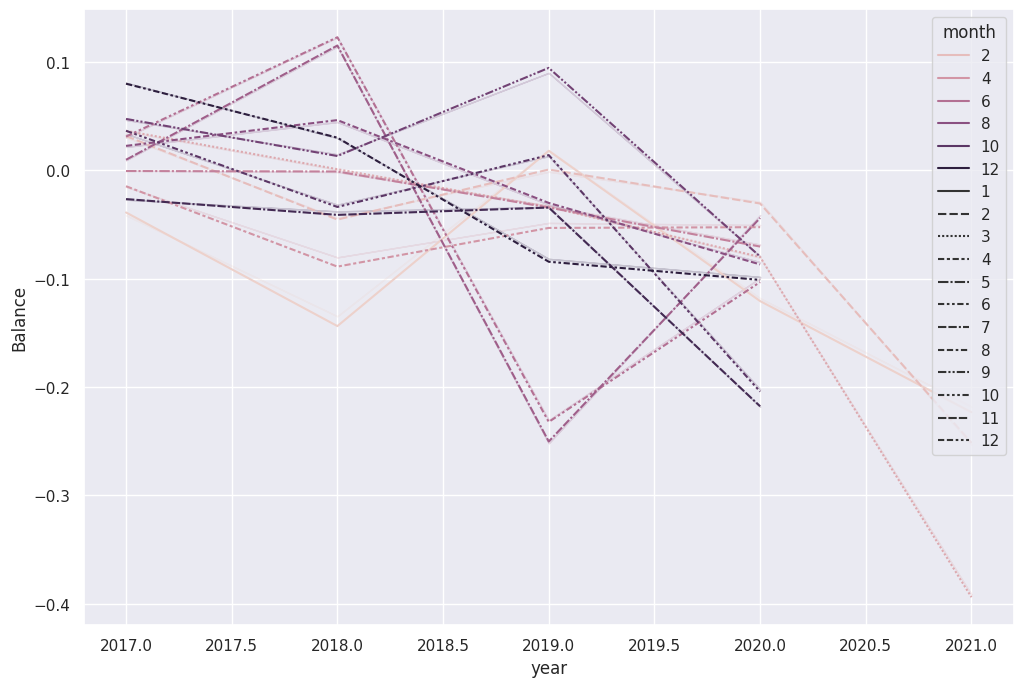

In [14]:
sns.lineplot(data=data, x="year", y="Balance", hue="month", errorbar=('ci', False), style="month")

In [15]:
data['MA7'] = data['Balance'].rolling(7).mean()
data['MA30'] = data['Balance'].rolling(30).mean()

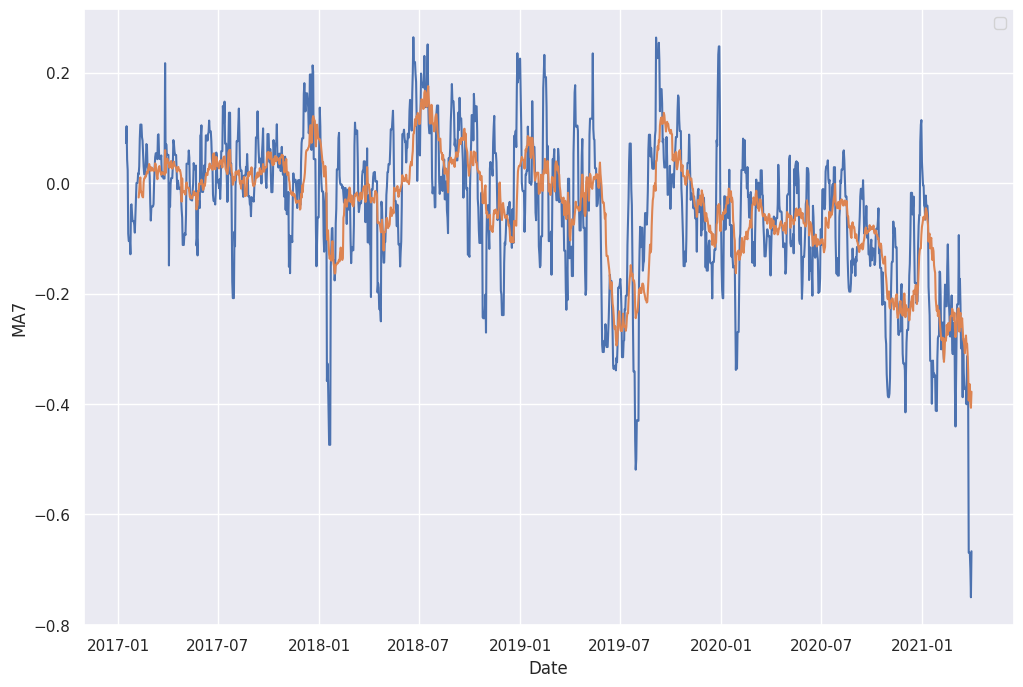

In [16]:
sns.lineplot(data=data, x="Date", y="MA7")
sns.lineplot(data=data, x="Date", y="MA30")
plt.legend()

### Добавление налоговых дат

In [17]:
data['profit_tax'] = (data.day == 20) & (data.month.isin([1,2,3,4]))
data['nds_tax'] = (data.day == 20) & (data.month.isin([4, 7, 10, 1]))
data['essb_tax'] = (data.day == 30) & (data.month.isin([4]))

In [18]:
data[data.columns[1:]].groupby('Key').agg(['count', 'sum', 'min', 'max', 'mean'])[['Balance']]

Balance                                         
        count        sum       min       max      mean
Key                                                   
4.25      243 -36.382355 -1.268604  0.374376 -0.149722
4.50       61 -15.301941 -2.514887  0.295191 -0.250851
5.50       61  -3.748142 -0.953475  0.311894 -0.061445
6.00       60  -3.359461 -0.519035  0.498466 -0.055991
6.25       62  -6.349886 -1.174608  0.995646 -0.102418
6.50       61  -0.587969 -0.548816  0.459265 -0.009639
7.00       30   2.839937 -0.358315  1.408863  0.094665
7.25      246  -2.639481 -1.514199  0.880087 -0.010730
7.50      149 -10.107802 -1.395696  0.745696 -0.067838
7.75      244  -4.145919 -2.383217  1.153604 -0.016991
8.25       61   0.342255 -0.566744  0.556453  0.005611
8.50       30   1.426453 -0.343241  0.504844  0.047548
9.00       92   1.945806 -0.876168  1.054336  0.021150
9.25       31  -0.017192 -0.890454  0.698869 -0.000555
9.75       61   0.696903 -1.244018  1.343028  0.011425
10.00      51  -0.002741 -0.548519  0.800391 -0.000054

In [19]:
data[data.columns[1:]].groupby('year').agg(['count', 'sum', 'min', 'max', 'mean'])[['Income','Outcome','Balance']]

Income                                      Outcome                   \
      count         sum  min       max      mean   count         sum  min   
year                                                                        
2017    357  318.374477  0.0  3.265402  0.891805     357  311.486408  0.0   
2018    365  387.249254  0.0  3.871082  1.060957     365  387.864240  0.0   
2019    365  425.099709  0.0  3.094232  1.164657     365  444.323962  0.0   
2020    366  427.430026  0.0  5.108775  1.167842     366  463.675423  0.0   
2021     90  115.861343  0.0  3.265402  1.287348      90  142.005859  0.0   

                         Balance                                           
           max      mean   count        sum       min       max      mean  
year                                                                       
2017  3.765746  0.872511     357   6.873045 -1.244018  1.343028  0.019252  
2018  3.752579  1.062642     365  -0.615553 -2.383217  1.079276 -0.001686  
2019  3.660411  1.217326     365 -19.119104 -1.659035  1.408863 -0.052381  
2020  5.003439  1.266873     366 -36.359468 -1.474698  0.498466 -0.099343  
2021  4.687433  1.577843      90 -26.170455 -2.514887  0.277592 -0.290783

In [20]:
data[data['profit_tax'].isin([1]) | data['nds_tax'].isin([1]) | data['essb_tax'].isin([1])][data.columns[1:]].groupby('year').agg(['count', 'sum', 'min', 'max', 'mean'])[['Income','Outcome','Balance']]

Income                                          Outcome             \
      count        sum       min       max      mean   count        sum   
year                                                                      
2017      7   7.956295  0.000000  2.093544  1.136614       7   6.864711   
2018      7   5.331724  0.000000  1.448364  0.761675       7   5.523252   
2019      7   5.556451  0.000000  2.238381  0.793779       7   5.187777   
2020      7  12.019574  1.275347  2.185713  1.717082       7  12.495431   
2021      3   3.739413  0.000000  1.948708  1.246471       3   4.187089   

                                   Balance                                \
           min       max      mean   count       sum       min       max   
year                                                                       
2017  0.000000  1.435197  0.980673       7  1.094976 -0.118528  1.054336   
2018  0.000000  1.566867  0.789036       7 -0.194403 -0.150575  0.093176   
2019  0.000000  2.040877  0.741111       7  0.362311 -0.329323  0.495918   
2020  1.395696  2.027710  1.785062       7 -0.490349 -0.574235  0.338319   
2021  0.000000  2.119878  1.395696       3 -0.426818 -0.266053  0.000000   

                
          mean  
year            
2017  0.156425  
2018 -0.027772  
2019  0.051759  
2020 -0.070050  
2021 -0.142273

## Добавление праздников

In [21]:
import datetime as DT
data['Weekday'] = data['Date'].apply(lambda x: DT.datetime.weekday(x)) 

data['is_holyday'] = (
    ((data.day == 9) & (data.month.isin([5]))) | 
    ((data.day == 1) & (data.month.isin([5]))) |
    ((data.day == 12) & (data.month.isin([6])))|
    ((data.day.isin([1,2,3])) & (data.month.isin([1]))) |
    ((data.day == 8) & (data.month.isin([3]))) |
    ((data.day == 23) & (data.month.isin([2]))))

data['is_holyday'] = data['is_holyday'] + data['Weekday'].isin([5,6])

In [22]:
import plotly.express as px
import plotly.graph_objects as go 

fig = go.Figure()

fig.add_trace(go.Scatter(y=data['Balance'], x=data['Date'], name='time_series'))

fig.update_layout(
   title_text='Временной ряд', 
   xaxis_title_text='дата', 
   yaxis_title_text='таргет'
)

fig.show()

In [23]:
data.to_csv('ts_project_data.csv')

In [25]:
from google.colab import files
files.download("ts_project_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>